In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate

import numpy as np
from numpy import linspace

from sympy.testing.pytest import ignore_warnings
from sympy import oo, Symbol, integrate, exp, Heaviside, plot, sin, cos, Piecewise, printing, lambdify
from sympy.abc import t, x
from sympy.interactive import init_printing
init_printing(pretty_print=True)

In [21]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__very_unlikely_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

f1min = 0
f1max = 4
f1amp = 2
f2min = 0
f2max = 2
f2amp = 2

f1 = Piecewise((0, t < f1min),(f1amp, t <= f1max),(0, True))
f2 = Piecewise((0, t < f2min),(f2amp, t <= f2max),(0, True))
f3 = convolve(f1, f2, t)
f3amp = f1amp*f2amp

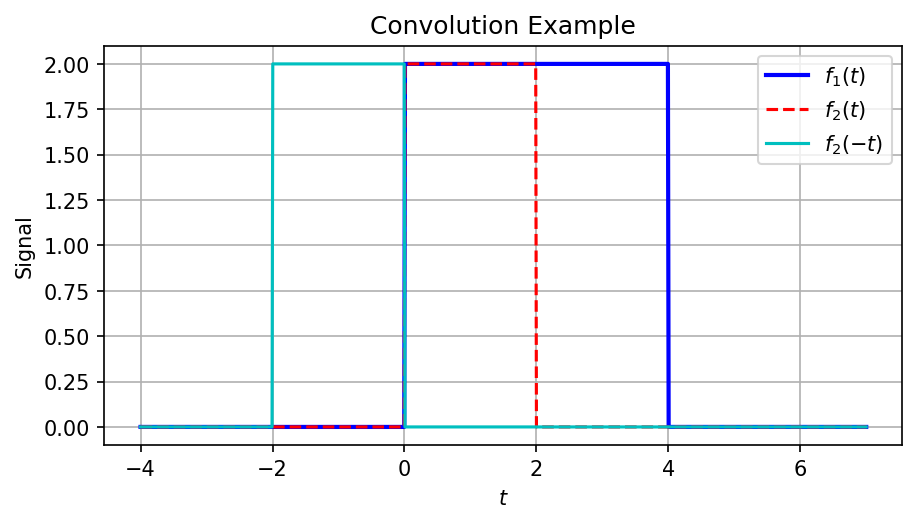

In [22]:
lam_f1 = lambdify(t, f1, modules=['numpy'])
lam_f2 = lambdify(t, f2, modules=['numpy'])
lam_f3 = lambdify(t, f3, modules=['numpy'])

tt_vals = linspace(-2-f2max+f1min, f1max+f2max+1, 1000)
tau_vals = linspace(-(f1max+f2max+1), f1max+f2max+1, 1000)

# don't know why lam_f3(tt_vals) fails
f3_tt = []
for tt in tt_vals:
    f3_tt.append(lam_f3(tt))

fig = plt.figure(1,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-',lw=2,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, lam_f2(-tt_vals),'c-',label='$f_2(-t)$')
plt.grid()
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()

In [23]:
def plot_functions(tval):
    plt.plot(tau_vals, lam_f1(tau_vals),'b-',lw=2,label=r'$f_1(\tau)$')
    plt.plot(tau_vals, lam_f2(tval-tau_vals),'c-',label=r'$f_2(-(\tau-'+str(-tval)+'))$')
    if (tval >= f1min + f2min) & (tval <= f1max + f2max):
        plt.fill([max(f1min,tval-f2max),max(f1min,tval-f2max),min(tval-f2min,f1max),min(tval-f2min,f1max)],[0,f3amp,f3amp,0],'g',alpha=0.3,label=r'$f_2('+str(tval)+r' - \tau)f_1(\tau)$')

    plt.grid()
    plt.legend()
    plt.ylabel("Signal")
    plt.xlabel(r"$\tau$")
    plt.title('Convolution Example $t = $'+str(tval))
    plt.show()

### Approaching from left - still outside

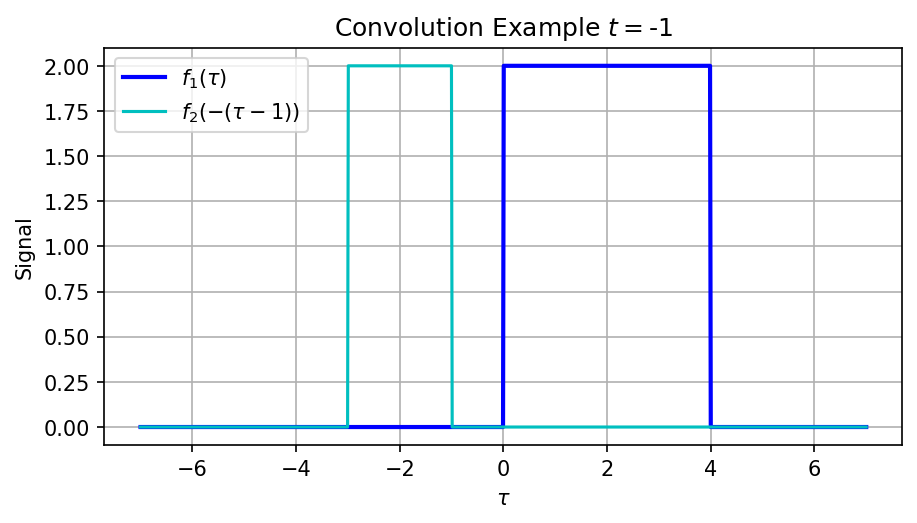

In [24]:
tval = -1
fig = plt.figure(1,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plot_functions(tval)

### Approaching from left - overlapping

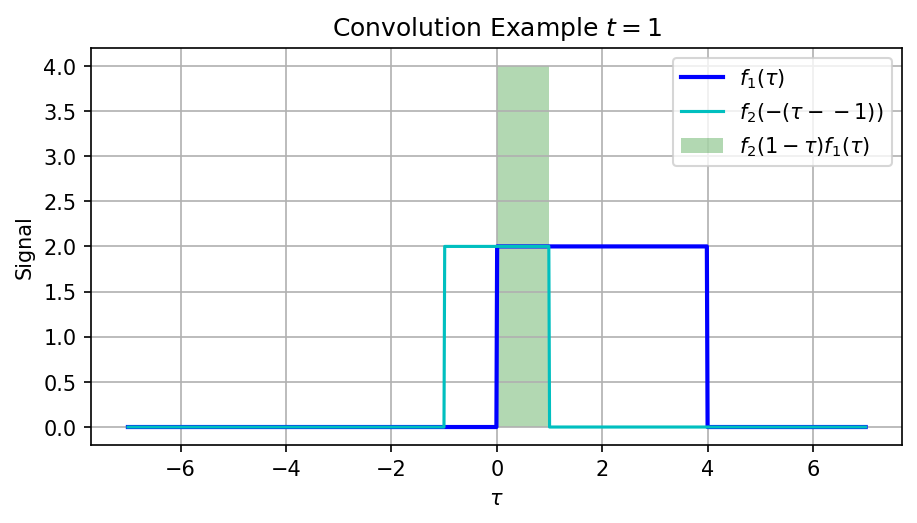

In [25]:
tval = 1
fig = plt.figure(2,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plot_functions(tval)

### Approaching from left - inside

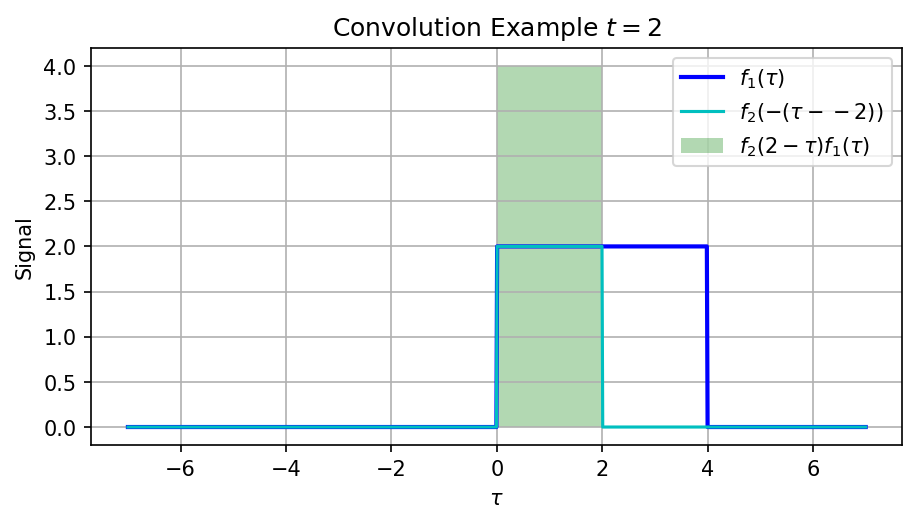

In [26]:
tval = 2
fig = plt.figure(3,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plot_functions(tval)

### Passing out on the right

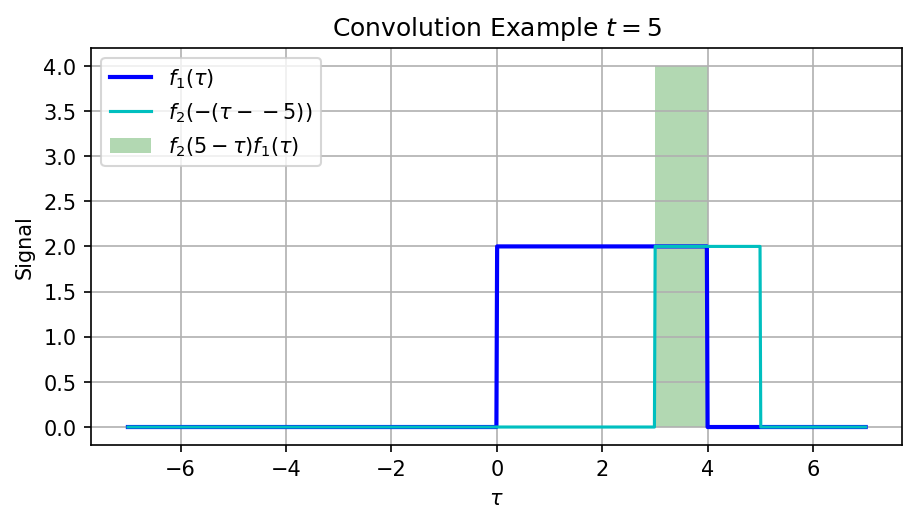

In [27]:
tval = 5
fig = plt.figure(4,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plot_functions(tval)

## Final Result

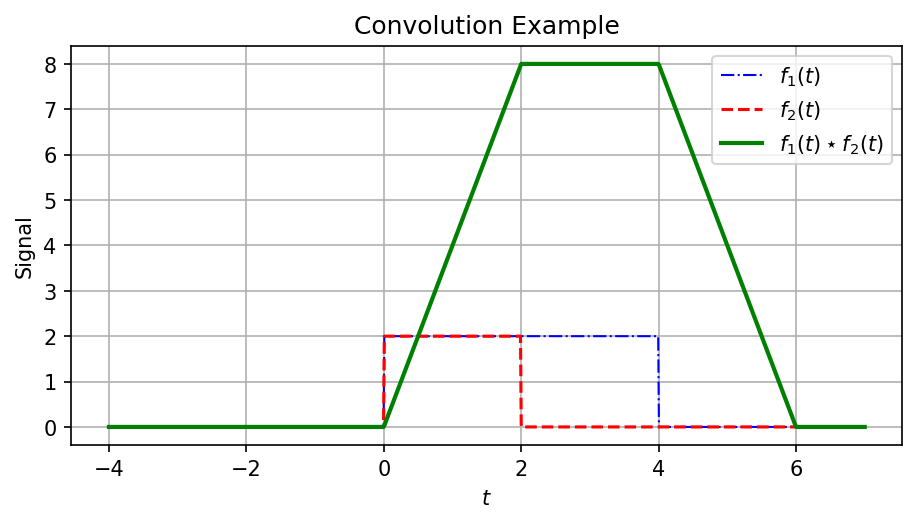

In [28]:
fig = plt.figure(5,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-.',lw=1,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3_tt,'g-',lw=2,label='$f_1(t)\star f_2(t)$')
plt.grid()
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()

In [10]:
f1 = Piecewise((0, t < -1),(1, t <= 0),(-1, t <= 1),(0, True))
f2 = Piecewise((0, t < 0),(2, t <= 2),(0, True))
f3 = convolve(f1, f2, t)
f3amp = f1amp*f2amp

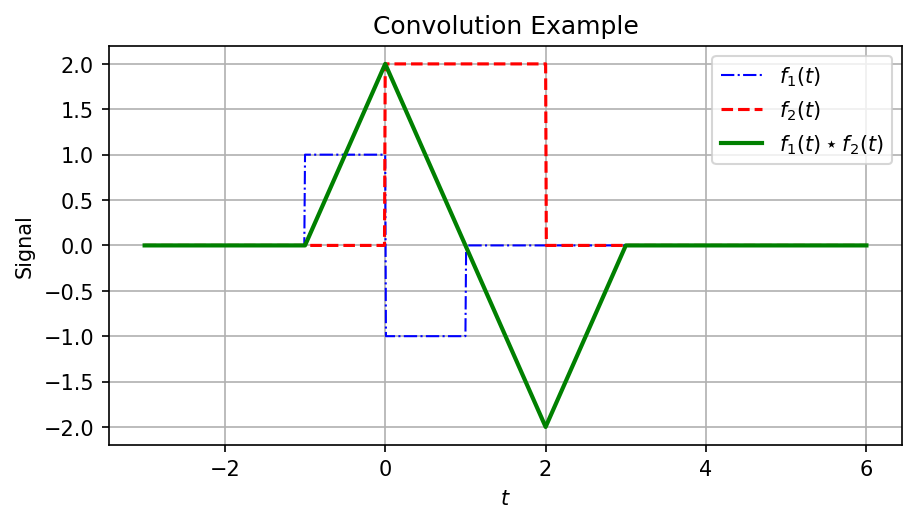

In [11]:
lam_f1 = lambdify(t, f1, modules=['numpy'])
lam_f2 = lambdify(t, f2, modules=['numpy'])
lam_f3 = lambdify(t, f3, modules=['numpy'])

tt_vals = linspace(-2-f2max+f1min, f1max+f2max+1, 1000)
tau_vals = linspace(-(f1max+f2max+1), f1max+f2max+1, 1000)

# don't know why lam_f3(tt_vals) fails
f3_tt = []
for tt in tt_vals:
    f3_tt.append(lam_f3(tt))

fig = plt.figure(5,figsize=(6, 3.375),dpi=150,constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-.',lw=1,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3_tt,'g-',lw=2,label='$f_1(t)\star f_2(t)$')
plt.grid()
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()